# HW_2

In [644]:
from pandas import read_csv

In [645]:
df = read_csv('bestsellers with categories.csv')
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [646]:
rows, columns = df.shape

print("Кількість рядків:", rows)
print("Кількість стовпців:", columns)

Кількість рядків: 550
Кількість стовпців: 7


In [647]:
print(f"Датасет зберігає дані про {rows} книг")

Датасет зберігає дані про 550 книг


In [648]:
print(df.columns)
# Зміна регістру та заміна пробілів на нижнє підкреслення
df.columns = df.columns.str.replace(' ', '_').str.lower()

print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')
Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [649]:
# Первинне дослідження даних

In [650]:
# Частка пропусків
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_ratio = (missing_values / total_values) * 100

print("Частка пропусків у кожній колонці:")
print(missing_ratio)

Частка пропусків у кожній колонці:
name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


In [651]:
print("Чи є в якихось змінних пропуски?")
if df.isnull().values.any():
    print("Так")
else:
    print("Ні")

Чи є в якихось змінних пропуски?
Ні


In [652]:
# Пошук та сортування даних

In [653]:
print("Який рейтинг у датасеті найвищий?")
max_rating = df['user_rating'].max()
print(f"Відповідь: {max_rating}")

Який рейтинг у датасеті найвищий?
Відповідь: 4.9


In [654]:
print("Скільки книг мають такий рейтинг?")
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Відповідь: {books_with_max_rating}")

Скільки книг мають такий рейтинг?
Відповідь: 52


In [655]:
print("Яка книга має найбільше відгуків?")
max_reviews_book = df.loc[df['reviews'].idxmax(), 'name']
print(f'Відповідь: "{max_reviews_book}"')

Яка книга має найбільше відгуків?
Відповідь: "Where the Crawdads Sing"


In [656]:
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?")
top_50 = df[(df['year'] == 2015) & (df['user_rating'] <= 50)]
most_expensive_book = top_50.loc[top_50['price'].idxmax(), 'name']
print(f'Відповідь: "{most_expensive_book}"')

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь: "Publication Manual of the American Psychological Association, 6th Edition"


In [657]:
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?")
fiction_top_50 = df[(df['year'] == 2010) & (df['user_rating'] <= 50) & (df['genre'] == 'Fiction')]
fiction_books_count = fiction_top_50.shape[0]
print(f'Відповідь: {fiction_books_count}')

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році?
Відповідь: 20


In [658]:
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?")
books_with_rating = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))]
count_books_with_rating = books_with_rating.shape[0]
print(f'Відповідь: {count_books_with_rating}')

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках?
Відповідь: 1


In [659]:
print("Яка книга остання у відсортованому списку? ")
books = df[(df['year'] == 2015) & (df['price'] < 8)]
sorted_books = books.sort_values(by='price')
last_book = sorted_books.iloc[-1]["name"]
print(f'Відповідь: "{last_book}"')

Яка книга остання у відсортованому списку? 
Відповідь: "Old School (Diary of a Wimpy Kid #10)"


In [660]:
#Агрегування даних та з'єднання таблиць

In [661]:
fiction_books = df[df['genre'] == 'Fiction']
max_price_fiction = fiction_books['price'].max()
min_price_fiction = fiction_books['price'].min()

fiction_books = df[df['genre'] == 'Non Fiction']
max_price_non_fiction = fiction_books['price'].max()
min_price_non_fiction = fiction_books['price'].min()

print(f'Максимальна ціна для жанру Fiction: {max_price_fiction}')
print(f'Мінімальна ціна для жанру Fiction: {min_price_fiction}')

print(f'Максимальна ціна для жанру Non Fiction: {max_price_non_fiction}')
print(f'Мінімальна ціна для жанру Non Fiction: {min_price_non_fiction}')

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


In [662]:
# Кількість книг для кожного з авторів
authors_books_count = df.groupby('author').agg(books_count=('name', 'count')).reset_index()
print(authors_books_count)

                         author  books_count
0              Abraham Verghese            2
1                Adam Gasiewski            1
2                 Adam Mansbach            1
3                     Adir Levy            1
4    Admiral William H. McRaven            1
..                          ...          ...
243             Walter Isaacson            3
244               William Davis            2
245            William P. Young            2
246            Wizards RPG Team            3
247                Zhi Gang Sha            2

[248 rows x 2 columns]


In [663]:
print("Якої розмірності вийшла таблиця?")
rows, columns = authors_books_count.shape

print("Кількість рядків:", rows)
print("Кількість стовпців:", columns)

Якої розмірності вийшла таблиця?
Кількість рядків: 248
Кількість стовпців: 2


In [664]:
print("Який автор має найбільше книг?")
authors_books_count_sorted = authors_books_count.sort_values(by='books_count', ascending=False)
author_with_most_books = authors_books_count_sorted.iloc[0]['author']
print(f'Відповідь: "{author_with_most_books}"')

Який автор має найбільше книг?
Відповідь: "Jeff Kinney"


In [665]:
print("Скільки книг цього автора?")
author_with_most_books = authors_books_count_sorted.iloc[0]['books_count']
print(f'Відповідь: {author_with_most_books}')

Скільки книг цього автора?
Відповідь: 12


In [666]:
# Середній рейтинг для кожного автора
authors_avg_rating = df.groupby('author').agg(avg_rating=('user_rating', 'mean')).reset_index()
print(authors_avg_rating)

                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


In [667]:
print("У якого автора середній рейтинг мінімальний?")
min_avg_rating = authors_avg_rating.loc[authors_avg_rating['avg_rating'].idxmin(), 'author']
print(f'Відповідь: "{min_avg_rating}"')

У якого автора середній рейтинг мінімальний?
Відповідь: "Donna Tartt"


In [668]:
print("Який у цього автора середній рейтинг?")
avg_rating = authors_avg_rating.loc[authors_avg_rating['avg_rating'].idxmin(), 'avg_rating']
print(f'Відповідь: {avg_rating}')

Який у цього автора середній рейтинг?
Відповідь: 3.9


In [669]:
# Об'єднаємо два датафрейми за стовпцем автора
merged_df = authors_books_count.merge(authors_avg_rating, on='author')
print(merged_df)

                         author  books_count  avg_rating
0              Abraham Verghese            2    4.600000
1                Adam Gasiewski            1    4.400000
2                 Adam Mansbach            1    4.800000
3                     Adir Levy            1    4.800000
4    Admiral William H. McRaven            1    4.700000
..                          ...          ...         ...
243             Walter Isaacson            3    4.566667
244               William Davis            2    4.400000
245            William P. Young            2    4.600000
246            Wizards RPG Team            3    4.800000
247                Zhi Gang Sha            2    4.600000

[248 rows x 3 columns]


In [670]:
print("Який автор перший у списку?")
first_author_merged = merged_df.loc[0, 'author']
print(f'Відповідь: {first_author_merged}')

Який автор перший у списку?
Відповідь: Abraham Verghese


In [671]:
from matplotlib.pyplot import figure, pie, title, axis, show, xlabel, ylabel, xticks, tight_layout, bar, text, grid, legend

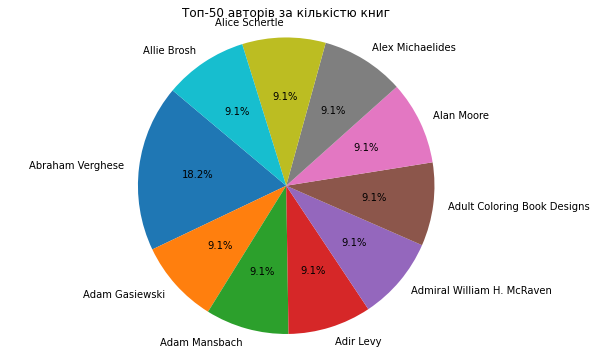

In [672]:
# Кругова діаграма кількості книг ТОП 10 авторів по рейтингу
top_authors_books_count = authors_books_count.head(10)

top_authors = top_authors_books_count['author']
books_count = top_authors_books_count['books_count']

figure(figsize=(10, 6))
pie(books_count, labels=top_authors, autopct='%1.1f%%', startangle=140)
title('Топ-50 авторів за кількістю книг')
axis('equal')  # Забезпечує круглу форму графіка
show()

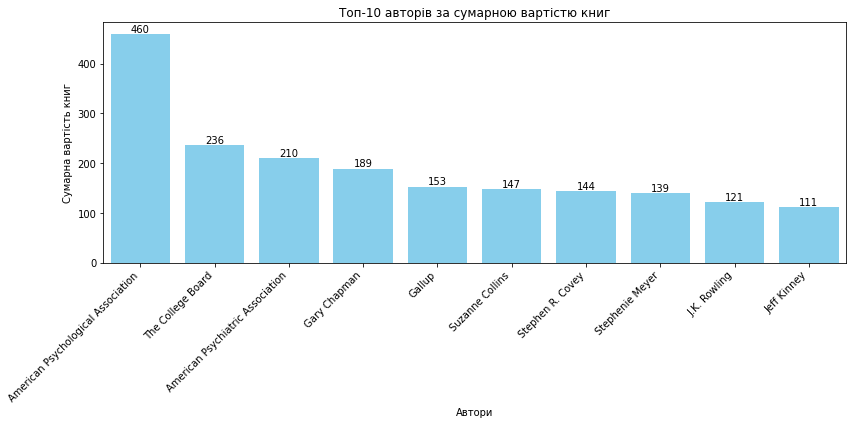

In [673]:
# Діаграма сумарної вартості книг ТОП 10 авторів по рейтингу
top10_authors_by_price = df.groupby('author')['price'].sum().nlargest(10)

figure(figsize=(12, 6))
bars = bar(top10_authors_by_price.index, top10_authors_by_price.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

top10_authors_by_price.plot(kind='bar', color='skyblue')
title('Топ-10 авторів за сумарною вартістю книг')
xlabel('Автори')
ylabel('Сумарна вартість книг')
xticks(rotation=45, ha='right')
tight_layout()
show()

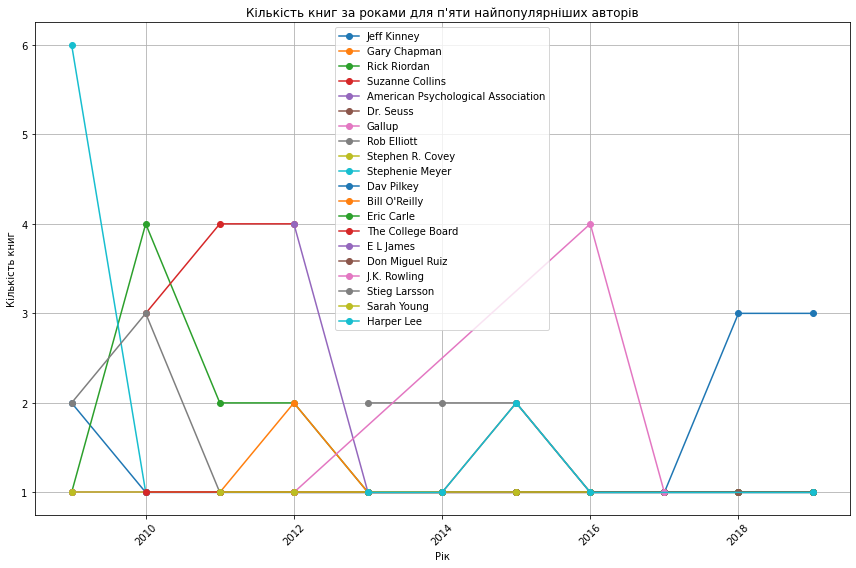

In [674]:
# Графік кількасті книг по роках lkz ТОП 20 авторів
books_per_author = df.groupby(['author', 'year'])['name'].count()

# Виберемо перших п'ять авторів за кількістю книг
top_authors = df['author'].value_counts().index[:20]

figure(figsize=(12, 8))
for author in top_authors:
    author_data = books_per_author.loc[author]
    author_data.plot(kind='line', marker='o', label=author)

title("Кількість книг за роками для п'яти найпопулярніших авторів")
xlabel('Рік')
ylabel('Кількість книг')
xticks(rotation=45)
legend()
grid(True)
tight_layout()
show()